In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from the uploaded CSV file
file_path = 'index.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


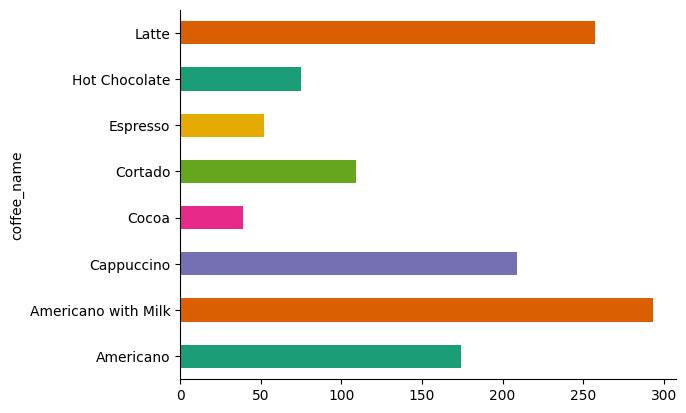

In [ ]:
# @title coffee_name

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('coffee_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

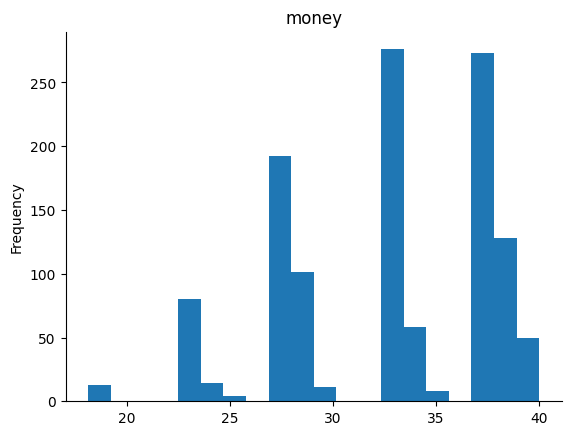

In [ ]:
# @title money

from matplotlib import pyplot as plt
data['money'].plot(kind='hist', bins=20, title='money')
plt.gca().spines[['top', 'right',]].set_visible(False)

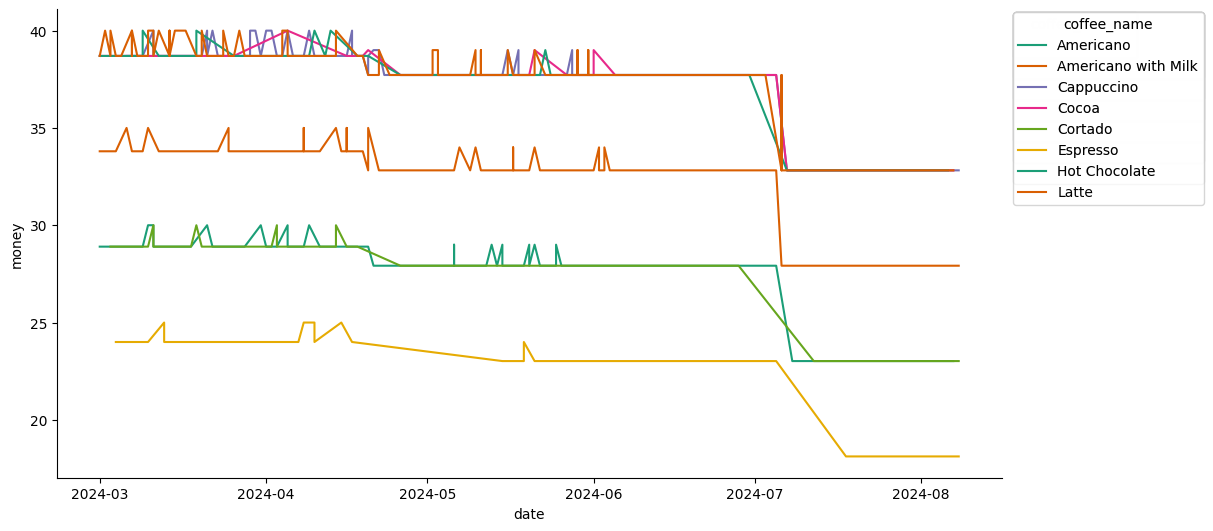

In [ ]:
# @title date vs money

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['money']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('coffee_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='coffee_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('money')

In [ ]:
import pandas as pd

# Memuat data dari file CSV
file_path = 'index.csv'  # Ganti dengan lokasi file yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama data
print(data.head())

# Melakukan analisis deskriptif dasar
analisis_deskriptif = data.describe()

# Melihat distribusi tipe pembayaran
distribusi_pembayaran = data['cash_type'].value_counts()

# Melihat total pendapatan dari setiap jenis kopi
pendapatan_kopi = data.groupby('coffee_name')['money'].sum()

# Menampilkan hasil analisis
print("\nAnalisis Deskriptif:")
print(analisis_deskriptif)

print("\nDistribusi Tipe Pembayaran:")
print(distribusi_pembayaran)

print("\nTotal Pendapatan dari Setiap Jenis Kopi:")
print(pendapatan_kopi)

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Analisis Deskriptif:
             money
count  1208.000000
mean     32.828460
std       5.107246
min      18.120000
25%      27.920000
50%      32.820000
75%      37.720000
max      40.000000

Distribusi Tipe Pembayaran:
cash_type
card    1119
cash      89
Name: count, dtype: int64

Total Pendapatan dari Setiap Jenis Kopi:
coffee_name
Americano              4759.64
Americano with Milk    9299.94
Cappu

In [ ]:
# Melakukan analisis deskriptif dasar
print("\nAnalisis Deskriptif:")
print(data.describe())

# Mengecek missing values
print("\nMissing Values:")
print(data.isnull().sum())



Analisis Deskriptif:
             money
count  1208.000000
mean     32.828460
std       5.107246
min      18.120000
25%      27.920000
50%      32.820000
75%      37.720000
max      40.000000

Missing Values:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


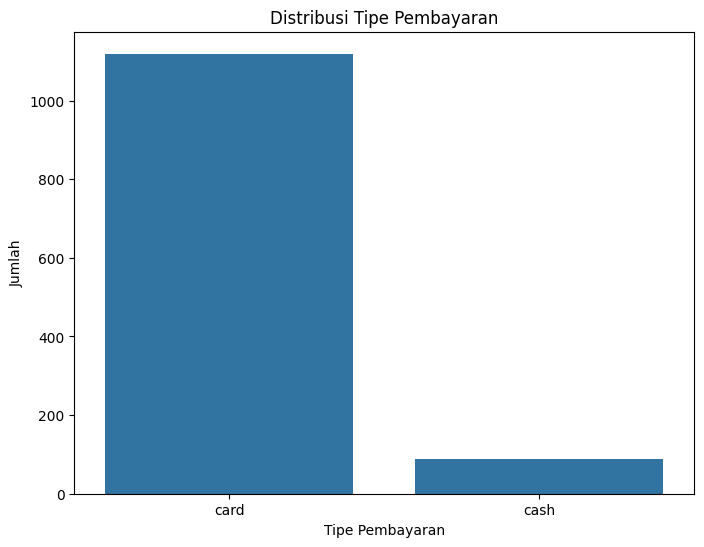

In [ ]:
# Visualisasi distribusi tipe pembayaran
plt.figure(figsize=(8, 6))
sns.countplot(x='cash_type', data=data)
plt.title('Distribusi Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah')
plt.show()


<ipython-input-13-ad77954cfc48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='money', y='coffee_name', data=pendapatan_kopi, palette='viridis')


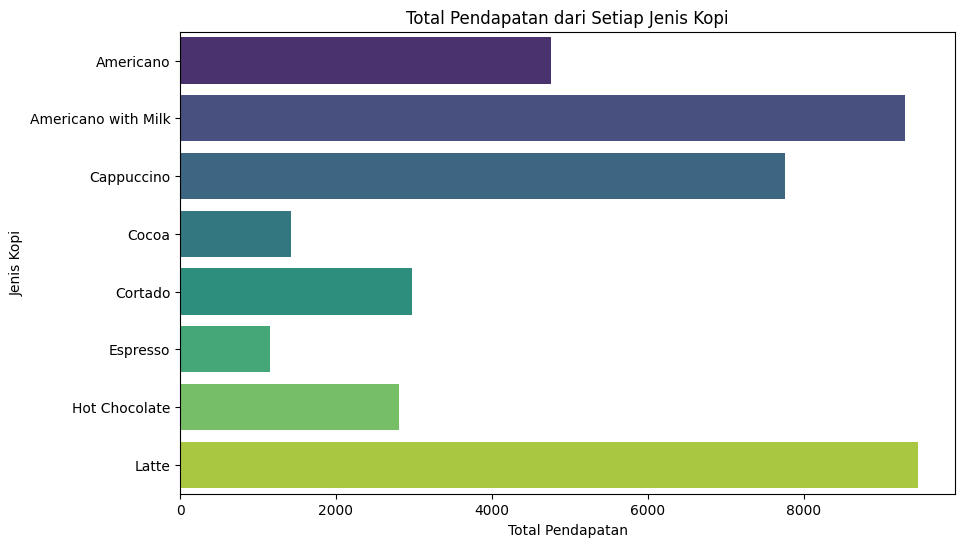

In [ ]:
# Visualisasi total pendapatan dari setiap jenis kopi
plt.figure(figsize=(10, 6))
pendapatan_kopi = data.groupby('coffee_name')['money'].sum().reset_index()
sns.barplot(x='money', y='coffee_name', data=pendapatan_kopi, palette='viridis')
plt.title('Total Pendapatan dari Setiap Jenis Kopi')
plt.xlabel('Total Pendapatan')
plt.ylabel('Jenis Kopi')
plt.show()


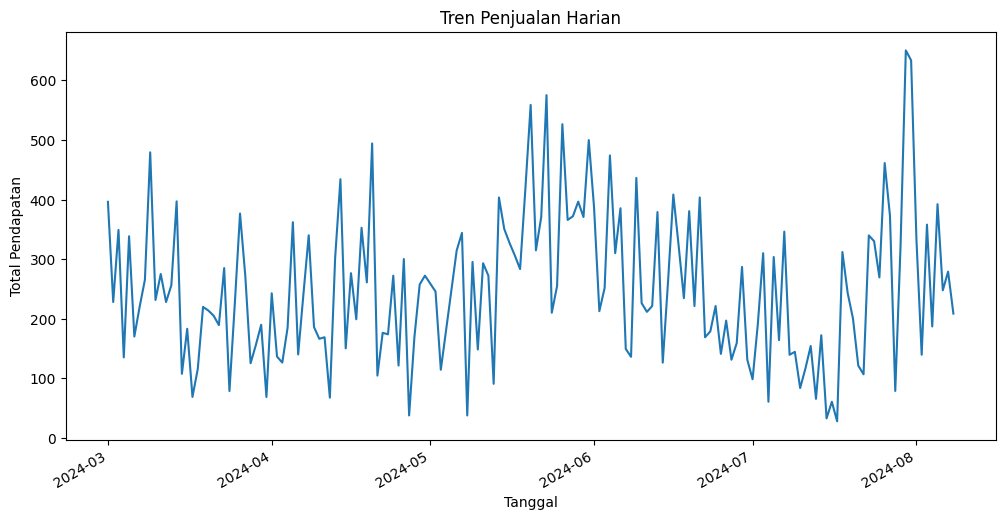

In [ ]:
# Konversi kolom 'date' menjadi tipe datetime
data['date'] = pd.to_datetime(data['date'])

# Visualisasi tren penjualan dari waktu ke waktu
plt.figure(figsize=(12, 6))
data.groupby('date')['money'].sum().plot()
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Pendapatan')
plt.show()


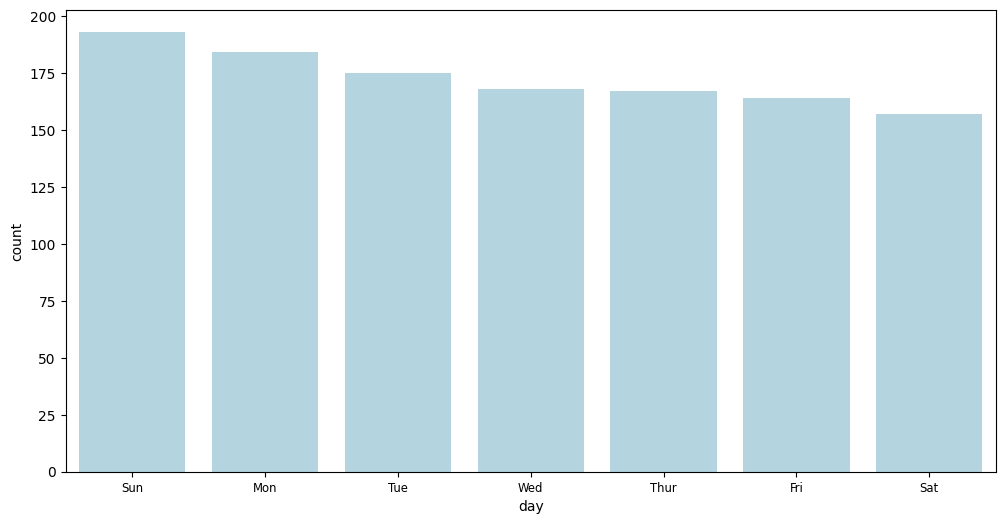

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has a 'date' column
weekday_sales = data['date'].dt.day_name().value_counts().reset_index()
weekday_sales.columns = ['day', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='lightblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.show()